# Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
df=pd.read_csv("salaries.csv")

# First we can ask the basic questions

In [3]:
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
522,2024,SE,FT,Analytics Engineer,230000,USD,230000,US,0,US,M
5144,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
13691,2021,MI,FT,Research Scientist,69999,USD,69999,CZ,50,CZ,L
1007,2024,SE,FT,Data Modeler,179000,USD,179000,US,0,US,M
3858,2023,SE,FT,Data Analyst,135000,USD,135000,US,100,US,M


In [4]:
df.shape

(13972, 11)

In [5]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.duplicated().sum()

5378

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,8594.000000,8.594000e+03,8594.000000,8594.000000
mean,2023.091808,1.729008e+05,146745.224343,37.229462
std,0.773301,4.642394e+05,72989.158332,47.619870
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,9.600000e+04,95019.000000,0.000000
50%,2023.000000,1.400000e+05,138750.000000,0.000000
75%,2024.000000,1.885000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [11]:
df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,8594,8594,8594,8594,8594,8594,8594
unique,4,4,146,23,88,77,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,5168,8534,1635,7667,7026,7075,7805


# Exploratory Data Analysis

### Bi-variate Analysis 

**First we can saperate the num and catagorical columns**

In [12]:
num_col=df.select_dtypes('number').columns
num_col

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

In [13]:
cat_col=df.select_dtypes('object').columns
cat_col

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

**Bivariate Analysis on  Num-Col-Num-Col**

# Salaries vs Salaies_in_usd

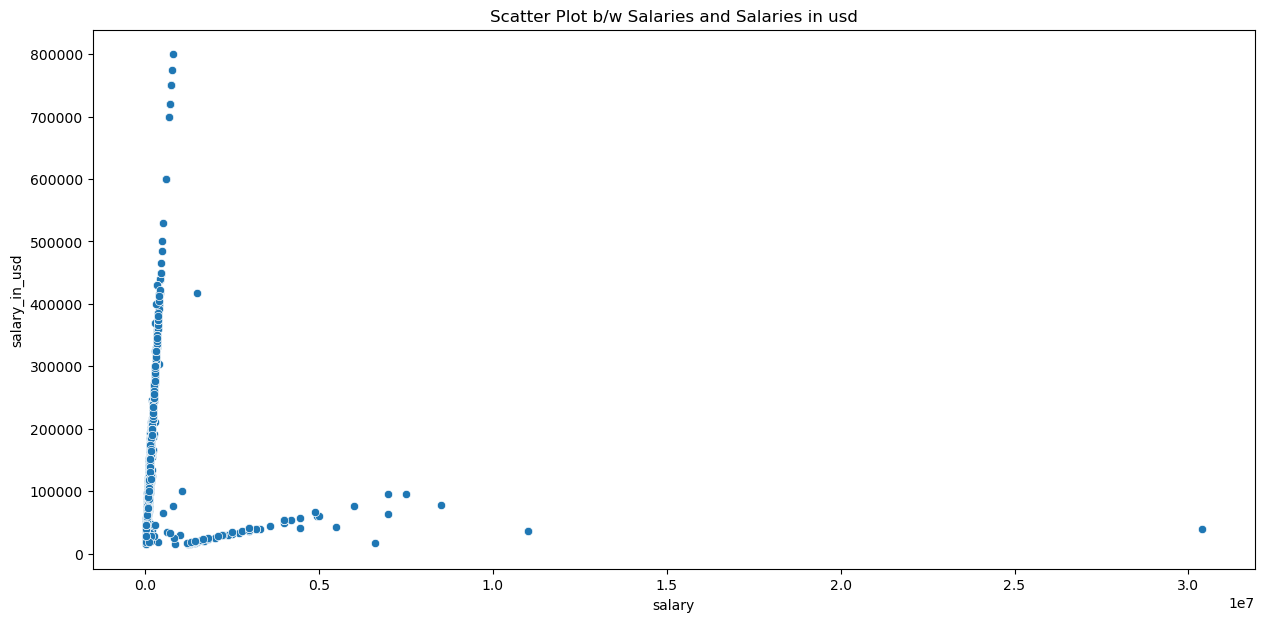

In [15]:
fig,ax1=plt.subplots(figsize=(15,7))
ax1.set_title("Scatter Plot b/w Salaries and Salaries in usd")
sns.scatterplot(x=df['salary'],y=df['salary_in_usd'])
plt.show()

# Bi-varaiate Analysis on cat-col vs num-col

**We can always perform bi-variate analysis on each col with target col**

In [28]:
cat_col

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

# experience_level vs salary_in_usd

In [20]:
temp=df.groupby(['experience_level'])['salary_in_usd'].mean().reset_index()
temp

,experience_level,salary_in_usd
0,EN,89270.038462
1,EX,192787.268519
2,MI,123199.407666
3,SE,163283.260836


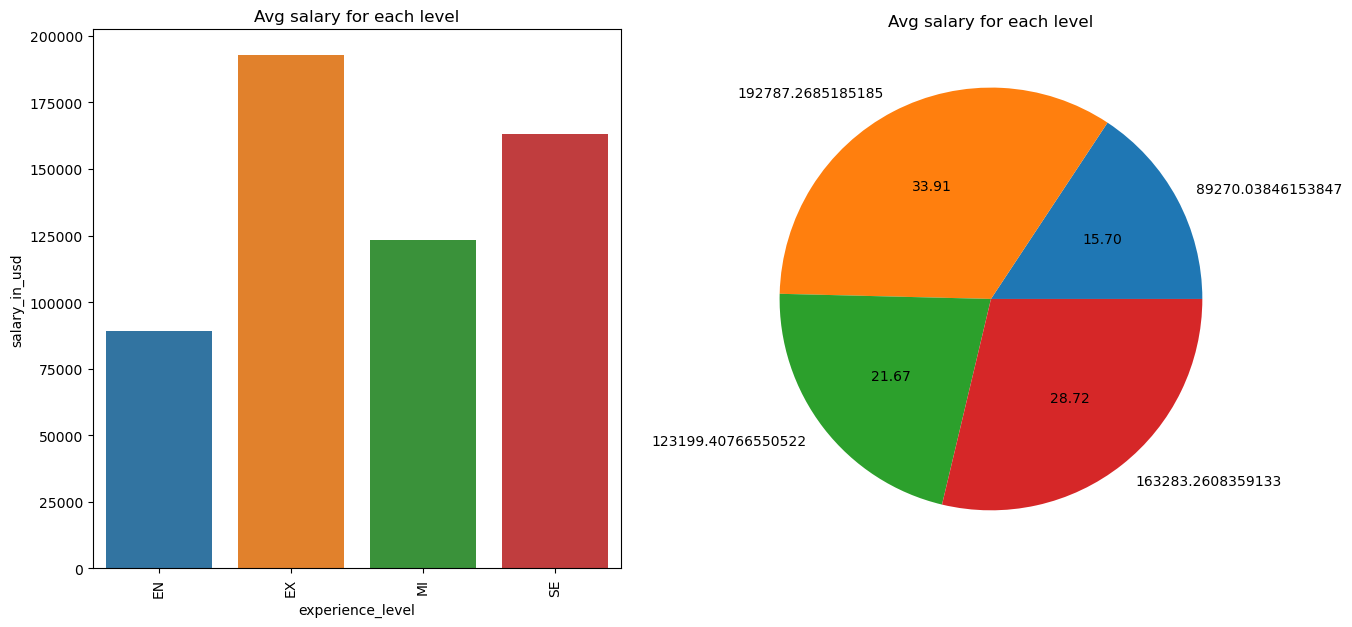

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7))
ax1.set_title("Avg salary for each level")
sns.barplot(x=temp['experience_level'],
            y=temp['salary_in_usd'],ax=ax1)
ax1.tick_params(axis='x',rotation=90)

ax2.set_title("Avg salary for each level")
plt.pie(temp['salary_in_usd'],
        labels=temp['salary_in_usd'],autopct="%.2f")
plt.show()

# employment_type vs salary_in_usd

In [23]:
temp=df.groupby(['employment_type'])['salary_in_usd'].mean().reset_index()
temp

,employment_type,salary_in_usd
0,CT,112007.500000
1,FL,51923.166667
2,FT,147204.163112
3,PT,61493.500000


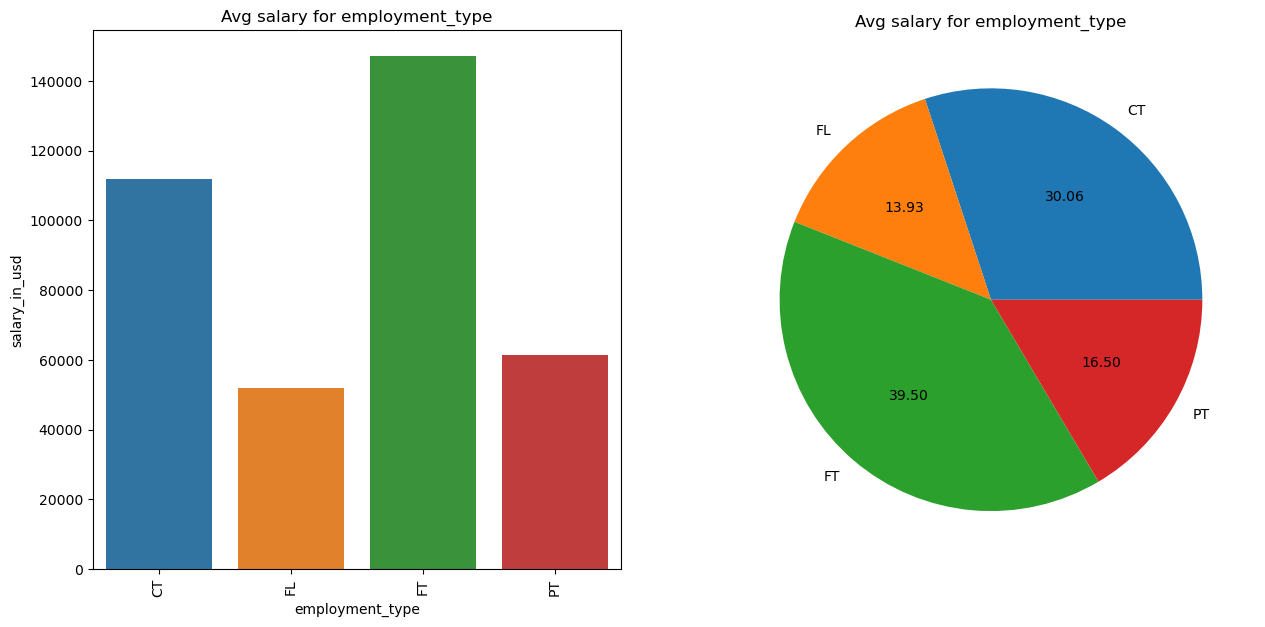

In [24]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7))
ax1.set_title("Avg salary for employment_type")
sns.barplot(x=temp['employment_type'],
            y=temp['salary_in_usd'],ax=ax1)
ax1.tick_params(axis='x',rotation=90)

ax2.set_title("Avg salary for employment_type")
plt.pie(temp['salary_in_usd'],
        labels=temp['employment_type'],autopct="%.2f")
plt.show()

# job_title vs salary_in_usd

In [28]:
temp=df.groupby(['job_title'])['salary_in_usd'].mean().reset_index().head(20)
temp

,job_title,salary_in_usd
0,AI Architect,248977.000000
1,AI Developer,135466.789474
2,AI Engineer,166433.531646
3,AI Product Manager,141766.666667
4,AI Programmer,62042.000000
5,AI Research Engineer,82963.000000
6,AI Research Scientist,88888.000000
7,AI Scientist,120578.875000
8,AI Software Engineer,174100.000000
9,AWS Data Architect,258000.000000


In [29]:
df.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L


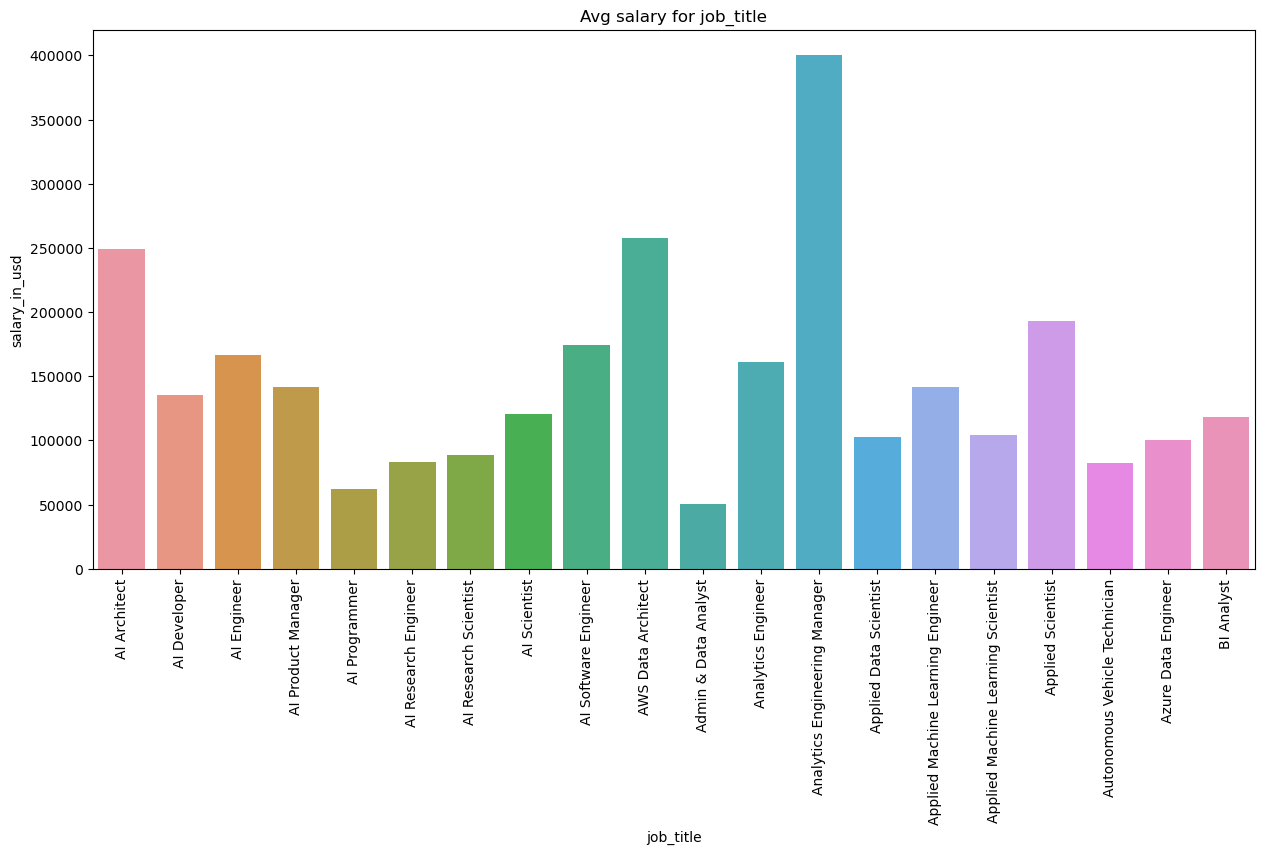

In [35]:
fig,ax1=plt.subplots(figsize=(15,7))
ax1.set_title("Avg salary for job_title")
sns.barplot(x=temp['job_title'],
            y=temp['salary_in_usd'],ax=ax1)
ax1.tick_params(axis='x',rotation=90)
plt.show()

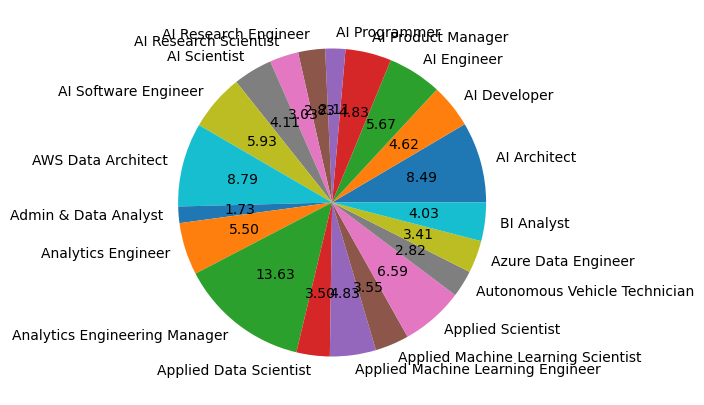

In [36]:
plt.figure(figsize=(10,5))
plt.pie(temp['salary_in_usd'],
        labels=temp['job_title'],autopct="%.2f")
plt.show()

# Multi-Variate Analysis

In [37]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M


# Find the avg salary for each job title and fully remote

In [45]:
temp=df[df['remote_ratio']==100].groupby(['job_title'])['salary_in_usd'].mean().reset_index().head(10)
temp

,job_title,salary_in_usd
0,AI Architect,289242.000000
1,AI Developer,131653.333333
2,AI Engineer,147422.100000
3,AI Programmer,78029.000000
4,AI Research Engineer,59907.000000
5,AI Scientist,110815.071429
6,AWS Data Architect,258000.000000
7,Admin & Data Analyst,51111.000000
8,Analytics Engineer,156045.862745
9,Applied Data Scientist,131758.285714


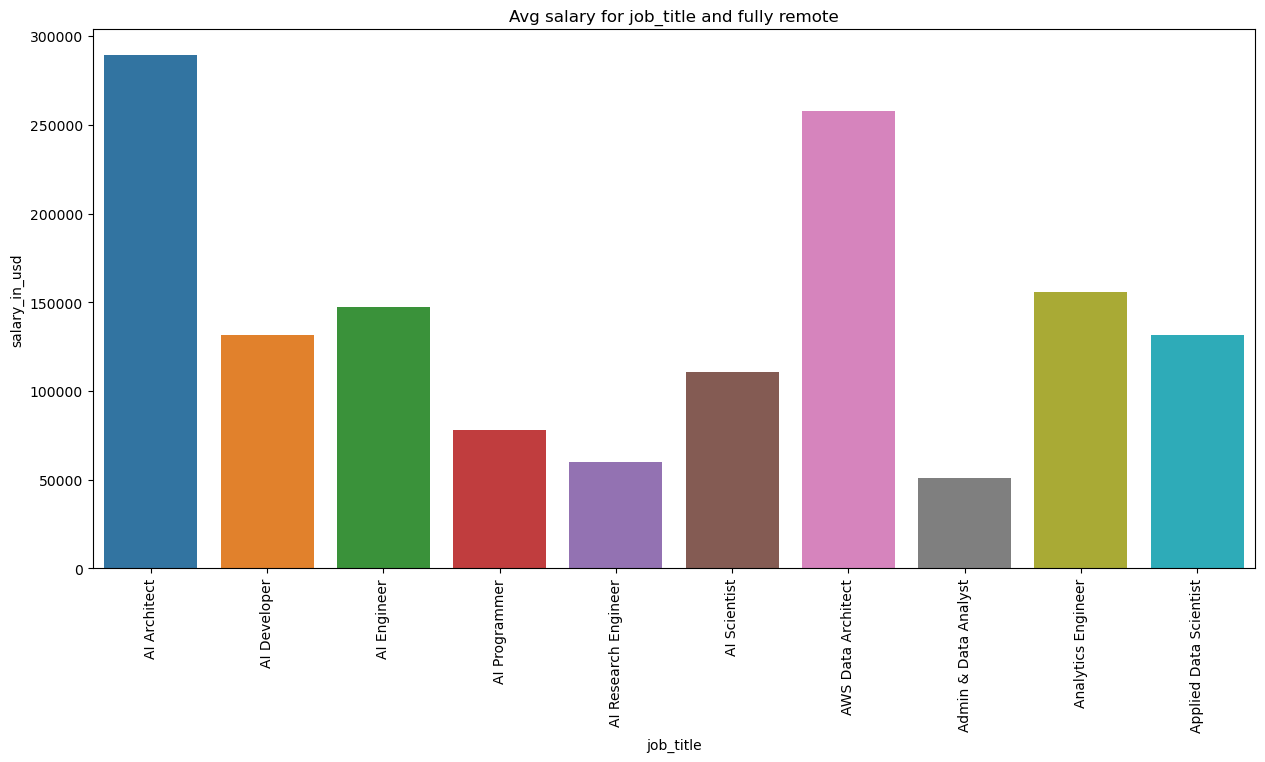

In [46]:
fig,ax1=plt.subplots(figsize=(15,7))
ax1.set_title("Avg salary for job_title and fully remote")
sns.barplot(x=temp['job_title'],
            y=temp['salary_in_usd'],ax=ax1)
ax1.tick_params(axis='x',rotation=90)
plt.show()

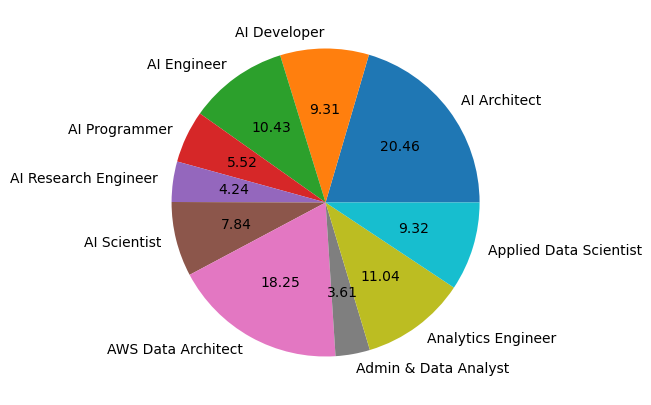

In [47]:
plt.figure(figsize=(10,5))
plt.pie(temp['salary_in_usd'],
        labels=temp['job_title'],autopct="%.2f")
plt.show()

# Find the avg salary for each remote experience level

In [49]:
temp=df[df['remote_ratio']==100].groupby(['employment_type'])['salary_in_usd'].mean().reset_index()
temp

,employment_type,salary_in_usd
0,CT,123556.352941
1,FL,60217.571429
2,FT,143138.647753
3,PT,47057.571429


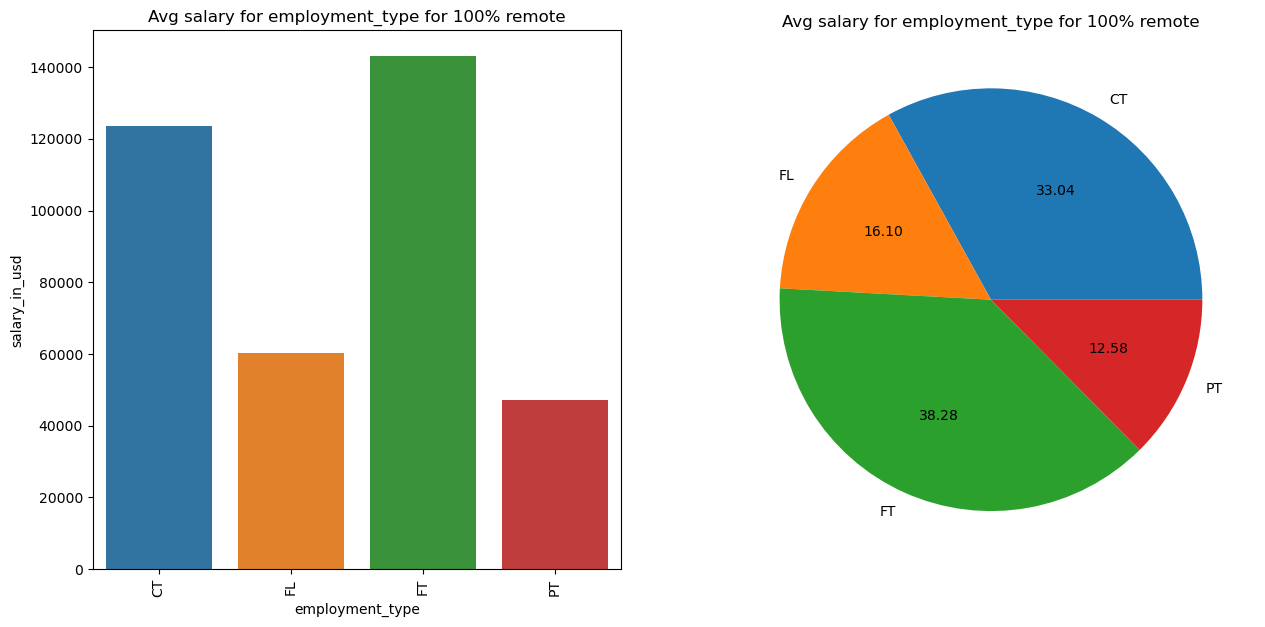

In [51]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7))
ax1.set_title("Avg salary for employment_type for 100% remote")
sns.barplot(x=temp['employment_type'],
            y=temp['salary_in_usd'],ax=ax1)
ax1.tick_params(axis='x',rotation=90)

ax2.set_title("Avg salary for employment_type for 100% remote")
plt.pie(temp['salary_in_usd'],
        labels=temp['employment_type'],autopct="%.2f")
plt.show()